In [2]:
import pandas as pd


## Pivot o Crosstab?

### [Testo analisi completa](https://datagy.io/pandas-crosstab/)

- pivot quando parto da un DF
- crosstab quando parto da liste o dizionari

```python
res_name = ["uno", "due", "tre"]
tipo_food = ["cibo", "bevanda", "spremuta"]
prezzo = [20, 4, 8]

pd.crosstab(index=[res_name], columns=[tipo_food], values=prezzo, aggfunc=sum)
```


>The crosstab function gives you a few advantages over the pivot table function:

    The summary can be normalized to show data as either a percentage of row or column totals, and
    The data doesn’t have the be structured as a dataframe prior to analysis.
---
Much of what you can accomplish with a Pandas Crosstab, you can also accomplish with a Pandas Pivot Table. The key differences are:

   1. The function does not require a dataframe as an input. It can also accept array-like objects for its rows and columns.
   2. The function can normalize the resulting dataframe, meaning that the values displayed can be displayed as percentage of row or column totals.
   3. The default function is len (count), whereas the pivot table one is numpy’s mean function.



In [3]:
res_name = ["uno", "due", "tre", "uno"]
tipo_food = ["alimenti", "bevanda", "spremuta", "alimenti"]
vendite = [20, 4, 8, 10]

pd.crosstab(
    index=[res_name],
    columns=[tipo_food],
    values=vendite,
    rownames=["Ristoranti"],
    colnames=["Tipologia cibo"],
    margins=True,
    margins_name="Vendite totali",
    aggfunc=sum).fillna("-")


Tipologia cibo,alimenti,bevanda,spremuta,Vendite totali
Ristoranti,,,,
due,-,4.0,-,4
tre,-,-,8.0,8
uno,30.0,-,-,30
Vendite totali,30.0,4.0,8.0,42


In [4]:
df = pd.read_excel("./sample_pivot.xlsx")
#df = pd.read_csv("sample_pivot.csv")
df.shape

(1000, 5)

## Setting option float format for PANDAS

In [5]:
#pd.options.display.float_format = '{:,.2f}'.format
#df.style.format(thousands=',')

In [6]:
df.head(3)

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306
1,2020-09-23,North,Children's Clothing,14.0,448
2,2020-04-02,South,Women's Clothing,17.0,425


In [7]:
pd.crosstab(df.Region, df.Type) 
# numero vendite per regione e tipologia = n. righe del dataset
# By default, Pandas will generate a crosstab which counts the number of times each item appears (the length of that series).


Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,113,122,176
North,85,89,142
South,45,39,53
West,42,41,53


In [8]:
pd.crosstab(index=df.Region, columns=df.Type, values=df.Sales, aggfunc='mean')

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,405.743363,423.647541,399.028409
North,438.894118,449.157303,432.528169
South,412.666667,475.435897,418.924528
West,480.523810,465.292683,419.188679


In [9]:
pd.crosstab(index=[df.Date.dt.quarter, df.Region], columns=df.Type, rownames=["Quarter", "Region"])

Type            Children's Clothing  Men's Clothing  Women's Clothing
Quarter Region                                                       
1       East                     29              36                39
        North                    11              23                36
        South                    10              14                14
        West                     15              13                12
2       East                     20              40                49
        North                    24              24                38
        South                    11               8                16
        West                      9               7                11
3       East                     34              19                44
        North                    31              19                40
        South                    11               8                16
        West                      7               7                12
4       East                     30              27                44
        North                    19              23                28
        South                    13               9                 7
        West                     11              14                18

In [10]:
pd.crosstab(index=[df.Region],
            columns=[df.Type, df.Date.dt.quarter], colnames=["Tipo", "Quarter"])


Tipo    Children's Clothing             Men's Clothing              \
Quarter                   1   2   3   4              1   2   3   4   
Region                                                               
East                     29  20  34  30             36  40  19  27   
North                    11  24  31  19             23  24  19  23   
South                    10  11  11  13             14   8   8   9   
West                     15   9   7  11             13   7   7  14   

Tipo    Women's Clothing              
Quarter                1   2   3   4  
Region                                
East                  39  49  44  44  
North                 36  38  40  28  
South                 14  16  16   7  
West                  12  11  12  18

In [11]:

df.pivot_table(index=['Region', 'Type'], aggfunc='count') # sommatoria valore unità vendite

Date  Sales  Units
Region Type                                   
East   Children's Clothing   113    113    113
       Men's Clothing        122    122    122
       Women's Clothing      176    176    176
North  Children's Clothing    85     85     85
       Men's Clothing         89     89      0
       Women's Clothing      142    142    142
South  Children's Clothing    45     45     45
       Men's Clothing         39     39     39
       Women's Clothing       53     53     53
West   Children's Clothing    42     42     42
       Men's Clothing         41     41     41
       Women's Clothing       53     53     53

In [12]:
df.pivot_table(index=df.Region, aggfunc="sum")
# totale vendite ed unità vendute per tipologia capo

,Sales,Units
Region,,
East,167763,8110.0
North,138700,4359.0
South,59315,2798.0
West,61476,2624.0


In [13]:
pd.crosstab(df.Region, df.Type, values=df.Sales, aggfunc='sum')

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,45849,51685,70229
North,37306,39975,61419
South,18570,18542,22203
West,20182,19077,22217


In [14]:
res = pd.crosstab(df.Region, df.Type, rownames=['Region of Sales'], colnames=['Type of Clothing'])
res

Type of Clothing,Children's Clothing,Men's Clothing,Women's Clothing
Region of Sales,,,
East,113,122,176
North,85,89,142
South,45,39,53
West,42,41,53


In [15]:
df[0:3] 
#!! diverso da df.drop([0, 3], axis=0) significa taglia riga 0 e riga 3 dal dataframe

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306
1,2020-09-23,North,Children's Clothing,14.0,448
2,2020-04-02,South,Women's Clothing,17.0,425


In [16]:
res.sum(axis=1) # sommo per riga, 0 sommo per colonna

Region of Sales
East     411
North    316
South    137
West     136
dtype: int64

  ## Normalize
  1.  ‘all’ or True – normalizes the values across the entire dataframe (as a percentage of the total across rows and columns)
  2.  ‘index’ – normalizes across rows
   3. ‘columns’ – normalizes down columns 

In [17]:
# Usiamo round per arrotondare e poi moltiplichiamo per 100 ottendendo la percentuale
pd.crosstab(df.Region, df.Type, normalize='index').round(4) * 100

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,27.49,29.68,42.82
North,26.90,28.16,44.94
South,32.85,28.47,38.69
West,30.88,30.15,38.97


In [18]:
pd.crosstab(df.Region, df.Type, normalize='all')

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,0.113,0.122,0.176
North,0.085,0.089,0.142
South,0.045,0.039,0.053
West,0.042,0.041,0.053


In [19]:
(pd.crosstab(df.Region, df.Type, normalize='columns').round(4) * 100).style.format('{:.2f}%')

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,39.65%,41.92%,41.51%
North,29.82%,30.58%,33.49%
South,15.79%,13.40%,12.50%
West,14.74%,14.09%,12.50%


In [20]:
perc_region = (pd.crosstab(df.Region, df.Type, normalize='columns').round(4) * 100).style.format('{:.2f}%')
perc_region

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,39.65%,41.92%,41.51%
North,29.82%,30.58%,33.49%
South,15.79%,13.40%,12.50%
West,14.74%,14.09%,12.50%


In [21]:

tabella = (pd.crosstab(df.Region, df.Type, margins=True, margins_name='Totale') /1000).style.format('M€ {:,.2f}')

<AxesSubplot:xlabel='Region'>

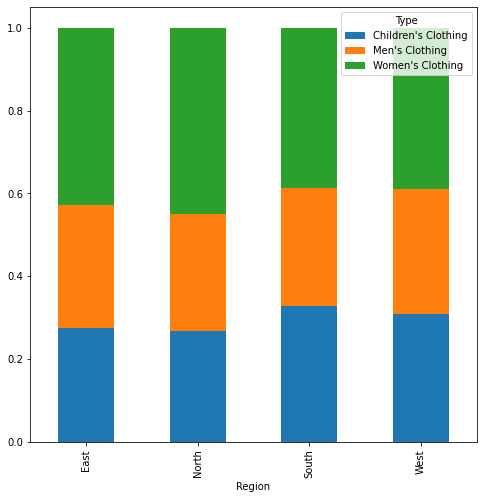

In [26]:
pd.crosstab(
    df.Region,
    df.Type,
    normalize='index',
).plot.bar(stacked=True, figsize=(8,8))

## Dimensionare TUTTI i grafici del notebook
```python
plt.rcParams["figure.figsize"] = (10,5)
```